In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm


#path of the datasets
os.chdir("../Statistical Learning Answers/..")
dataset_path = os.path.join(os.getcwd(),"DataSets")

In [2]:
auto_df = pd.read_csv(f'{dataset_path}/Auto.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

## a)

In [4]:
auto_df_a = auto_df.loc[auto_df.horsepower.apply(lambda x: x.isnumeric())].copy()
auto_df_a['horsepower'] = pd.to_numeric(auto_df_a['horsepower'])


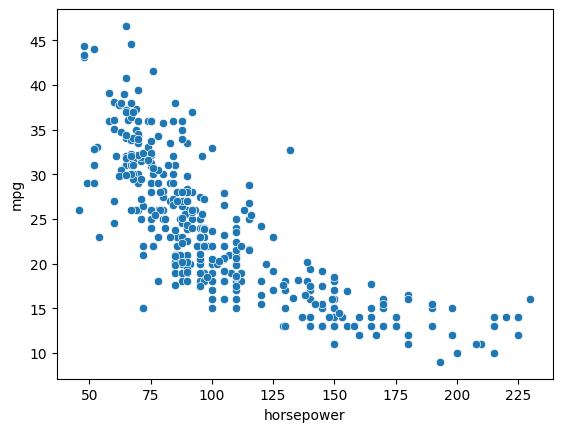

In [5]:
sns.scatterplot(auto_df_a,x=auto_df_a['horsepower'], y=auto_df_a['mpg'])
plt.show()

In [6]:
X = pd.DataFrame(
    {
        'intercept': np.ones(auto_df_a.shape[0]),
        'horsepower': auto_df_a['horsepower']
    }
)

X
y = auto_df_a['mpg']

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           7.03e-81
Time:                        16:41:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Prediction using horsepower equals to 98
prediction = results.get_prediction([1,98])

print(f"prediction: {float(prediction.predicted_mean):.3f}")

#Summary frame

summary = prediction.summary_frame(alpha=0.05)

#Confidence Interval

pred_conf_interval = (summary.at[0,'mean_ci_lower'], summary.at[0, 'mean_ci_upper'])

print(f"Confidence Interval: {pred_conf_interval}")

#Prediction Interval 

pred_prediction_interval = (summary.at[0,'obs_ci_lower'], summary.at[0, 'obs_ci_upper'])
print(f"prediction_interval: {pred_prediction_interval}")


prediction: 24.467
Confidence Interval: (23.97307896070394, 24.961075344320914)
prediction_interval: (14.80939607096712, 34.12475823405774)


In [8]:
prediction.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


I. There's a relatinship between the predictor and the response variable given that p-value is very low

II. Since R^2 is 0.606, we can say that approximately 60% of the variation in the mpg is caused by the horsepower

III. Negative

IV. 24.46. Confidence Interval: (23.97307896070394, 24.961075344320914), prediction_interval: (14.80939607096712, 34.12475823405774)

## b)

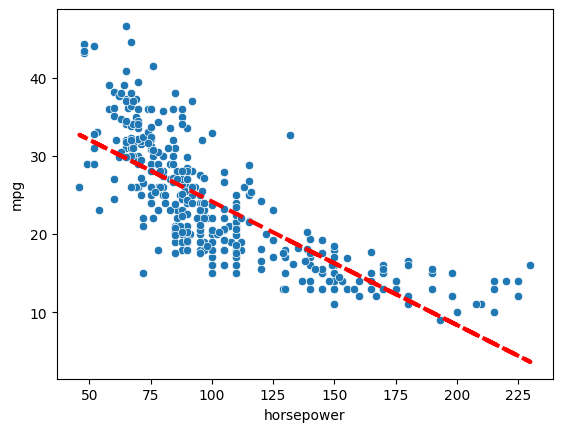

In [10]:
predictions = [results.predict([1, x]) for x in auto_df_a['horsepower']]

sns.scatterplot(auto_df_a,x=auto_df_a['horsepower'], y=auto_df_a['mpg'])
plt.plot(auto_df_a['horsepower'], predictions, color='red', linestyle='dashed', linewidth=3)
plt.show()

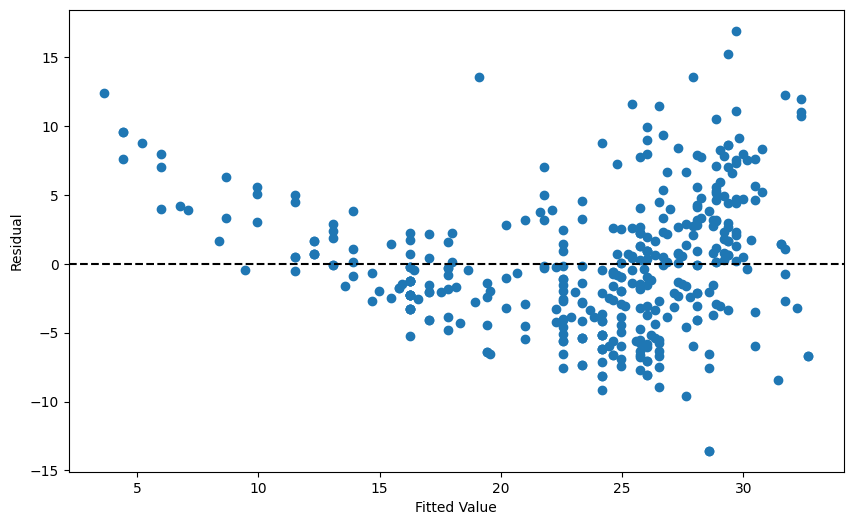

In [16]:
ax = plt.subplots(figsize=(10,6))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

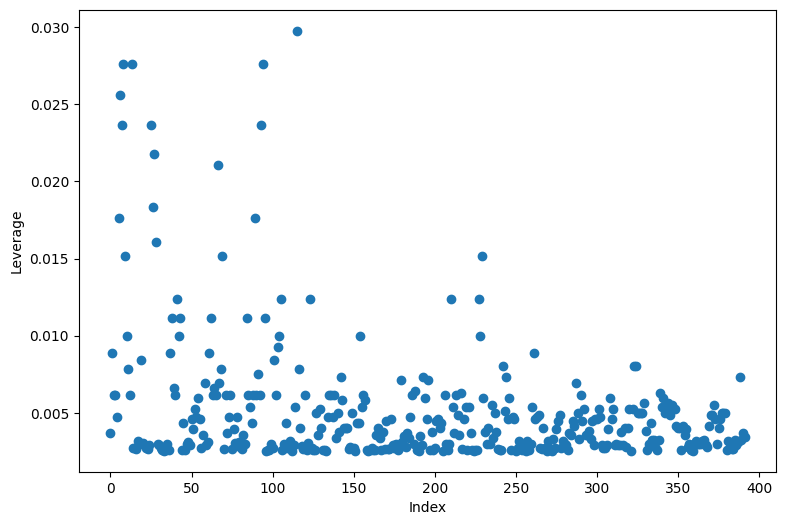

115


In [23]:
infl = results.get_influence()
ax = plt.subplots(figsize=(9, 6))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
plt.show()
print(np.argmax(infl.hat_matrix_diag))